In [65]:
import os
import requests
import pandas as pd
import numpy as np 
import panel as pn
pn.extension('plotly')
import plotly.express as px
import matplotlib.pyplot as plt

import seaborn as sns
import json

%matplotlib inline

In [66]:
my_cwn = 100 
my_dmp = 100
my_hvn = 100
my_pmv = 100

In [67]:
# import yfinance data
import yfinance as yf

In [68]:
data_df = yf.download(tickers = ['CWN.AX', 'DMP.AX', 'HVN.AX', 'PMV.AX'],period = "7d", interval = "1h")
dataindex_df = yf.download("^AXJO")  

[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  1 of 1 completed


In [69]:
data_df = data_df[["Close","Volume"]]
data_df


Close                                  Volume  \
                           CWN.AX     DMP.AX HVN.AX     PMV.AX     CWN.AX   
2022-04-01 10:00:00+11:00  12.760  85.559998  5.280  26.740000        0.0   
2022-04-01 11:00:00+11:00  12.765  85.300003  5.290  26.639999   143473.0   
2022-04-01 12:00:00+11:00  12.770  84.559998  5.260  26.480000  1266560.0   
2022-04-01 13:00:00+11:00  12.775  84.730003  5.230  26.459999   627307.0   
2022-04-01 14:00:00+11:00  12.790  84.910004  5.210  26.830000   250825.0   
2022-04-01 15:00:00+11:00  12.785  84.559998  5.210  26.900000   845679.0   
2022-04-04 10:00:00+10:00  12.780  83.980003  5.220  27.070000        0.0   
2022-04-04 11:00:00+10:00  12.770  83.900002  5.220  27.299999   892053.0   
2022-04-04 12:00:00+10:00  12.780  83.589996  5.240  27.180000   442460.0   
2022-04-04 13:00:00+10:00  12.790  83.550003  5.260  27.240000   166077.0   
2022-04-04 14:00:00+10:00  12.780  83.550003  5.230  27.270000   588314.0   
2022-04-04 15:00:00+10:00  12.800  83.209999  5.170  27.120001   246877.0   
2022-04-04 16:00:00+10:00  12.790  82.809998  5.200  27.170000   272732.0   
2022-04-05 10:00:00+10:00  12.850  83.260002  5.200  27.240000        0.0   
2022-04-05 11:00:00+10:00  12.830  81.925003  5.215  27.570000   900708.0   
2022-04-05 12:00:00+10:00  12.830  82.019997  5.220  27.680000   159720.0   
2022-04-05 13:00:00+10:00  12.830  82.889999  5.210  27.639999    61808.0   
2022-04-05 14:00:00+10:00  12.840  82.500000  5.170  27.129999   604147.0   
2022-04-05 15:00:00+10:00  12.840  82.470001  5.160  27.100000   357830.0   
2022-04-05 16:00:00+10:00  12.850  82.629997  5.170  27.150000   113798.0   
2022-04-06 10:00:00+10:00  12.805  84.080002  5.130  26.730000        0.0   
2022-04-06 11:00:00+10:00  12.800  83.250000  5.140  26.870001   644263.0   
2022-04-06 12:00:00+10:00  12.790  83.809998  5.145  26.850000  5809508.0   
2022-04-06 13:00:00+10:00  12.775  83.309998  5.140  26.719999   649859.0   
2022-04-06 14:00:00+10:00  12.800  83.470001  5.140  26.809999   409050.0   
2022-04-06 15:00:00+10:00  12.765  83.330002  5.120  26.809999   688057.0   
2022-04-06 16:00:00+10:00  12.750  83.300003  5.130  26.860001  1061811.0   
2022-04-07 10:00:00+10:00  12.770  82.870003  5.080  26.410000        0.0   
2022-04-07 11:00:00+10:00  12.770  81.860001  5.080  26.370001  1831945.0   
2022-04-07 12:00:00+10:00  12.770  81.769997  5.045  26.230000   258641.0   
2022-04-07 13:00:00+10:00  12.770  81.279999  5.040  26.250000    49100.0   
2022-04-07 14:00:00+10:00  12.770  81.129997  5.025  26.190001   157956.0   
2022-04-07 15:00:00+10:00  12.760  81.190002  5.030  26.180000   742040.0   
2022-04-07 16:00:00+10:00  12.740  81.330002  5.040  26.129999   650529.0   
2022-04-08 10:00:00+10:00  12.790  80.040001  5.020  26.000000        0.0   
2022-04-08 11:00:00+10:00  12.780  81.089996  5.050  26.170000    49270.0   
2022-04-08 12:00:00+10:00  12.775  81.239998  5.060  26.040001    26470.0   
2022-04-08 13:00:00+10:00  12.780  80.930000  5.060  26.020000   119839.0   
2022-04-08 14:00:00+10:00  12.780  80.019997  5.055  26.030001    24689.0   
2022-04-08 15:00:00+10:00  12.780  80.669998  5.050  26.020000   141169.0   
2022-04-11 10:00:00+10:00  12.790  80.320000  5.095  26.010000    66005.0   
2022-04-11 11:00:00+10:00  12.800  80.330002  5.080  25.920000   625356.0   
2022-04-11 12:00:00+10:00  12.795  80.120003  5.070  25.809999    54657.0   
2022-04-11 13:00:00+10:00  12.795  79.589996  5.050  25.730000    49475.0   
2022-04-11 14:00:00+10:00  12.800  79.889999  5.070  25.870001   362803.0   
2022-04-11 15:00:00+10:00  12.800  79.809998  5.080  25.860001    38766.0   
2022-04-11 15:24:42+10:00  12.805  79.800003    NaN        NaN        0.0   
2022-04-11 15:24:45+10:00     NaN        NaN  5.080  25.855000        NaN   

                                                         
                             DMP.AX     HVN.AX   PMV.AX  
2022-04-01 10:00:00+11:00       0.0        0.0      0.0  
202

In [70]:
dataindex_df = dataindex_df[["Close"]]
dataindex_df.tail(7) 


,Close
Date,
2022-04-01,7493.799805
2022-04-04,7513.700195
2022-04-05,7527.899902
2022-04-06,7490.100098
2022-04-07,7442.799805
2022-04-08,7478.000000
2022-04-11,7479.100098


In [71]:

dataclose_df = data_df["Close"].copy()
dataclose_df


,CWN.AX,DMP.AX,HVN.AX,PMV.AX
2022-04-01 10:00:00+11:00,12.760,85.559998,5.280,26.740000
2022-04-01 11:00:00+11:00,12.765,85.300003,5.290,26.639999
2022-04-01 12:00:00+11:00,12.770,84.559998,5.260,26.480000
2022-04-01 13:00:00+11:00,12.775,84.730003,5.230,26.459999
2022-04-01 14:00:00+11:00,12.790,84.910004,5.210,26.830000
2022-04-01 15:00:00+11:00,12.785,84.559998,5.210,26.900000
2022-04-04 10:00:00+10:00,12.780,83.980003,5.220,27.070000
2022-04-04 11:00:00+10:00,12.770,83.900002,5.220,27.299999
2022-04-04 12:00:00+10:00,12.780,83.589996,5.240,27.180000
2022-04-04 13:00:00+10:00,12.790,83.550003,5.260,27.240000


In [72]:
datavol_df = data_df["Volume"].copy()
datavol_df

,CWN.AX,DMP.AX,HVN.AX,PMV.AX
2022-04-01 10:00:00+11:00,0.0,0.0,0.0,0.0
2022-04-01 11:00:00+11:00,143473.0,34066.0,373952.0,43742.0
2022-04-01 12:00:00+11:00,1266560.0,23950.0,390644.0,20023.0
2022-04-01 13:00:00+11:00,627307.0,19439.0,793007.0,24066.0
2022-04-01 14:00:00+11:00,250825.0,16828.0,1232501.0,35277.0
2022-04-01 15:00:00+11:00,845679.0,38896.0,1254597.0,53467.0
2022-04-04 10:00:00+10:00,0.0,0.0,0.0,0.0
2022-04-04 11:00:00+10:00,892053.0,16119.0,316242.0,20360.0
2022-04-04 12:00:00+10:00,442460.0,16267.0,279723.0,16032.0
2022-04-04 13:00:00+10:00,166077.0,22721.0,458764.0,20520.0


In [73]:
def read_data(data, start, end):
    data_df = yf.download(data, start, end)
    period = "7d"
    interval = "1h"
    data_df.dropna(inplace = True)
    dataclose_df = data_df["Close"]
    return dataclose_df


In [74]:
#get standard deviation of Volumes 
datavol_std = datavol_df.std()
datavol_std.head()

CWN.AX    887969.901290
DMP.AX     61829.883155
HVN.AX    323537.478414
PMV.AX     15167.630483
dtype: float64

In [75]:
#aussharedata = read_data(['CWN.AX', 'DMP.AX', 'HVN.AX', 'PMV.AX'], "2022-03-25","2022-04-01")

In [76]:
# Helper create_bar_chart function
def create_bar_chart(data, title, xlabel, ylabel, color):
    """
    Create a barplot based in the data argument.
    """
    fig = plt.figure()
    bar_chart = data.plot.bar(color=color)
    bar_chart.set_xlabel(xlabel)
    bar_chart.set_ylabel(ylabel)
    bar_chart.set_title(title)
    plt.show()
    plt.close(fig)

In [77]:
def create_line_chart(data, title, xlabel, ylabel, color):
    """
    Create a line chart based in the data argument.
    """
    fig = plt.figure()
    line_chart = data.plot(color=color)
    line_chart.set_xlabel(xlabel)
    line_chart.set_ylabel(ylabel)
    line_chart.set_title(title)
    plt.show()
    plt.close(fig)

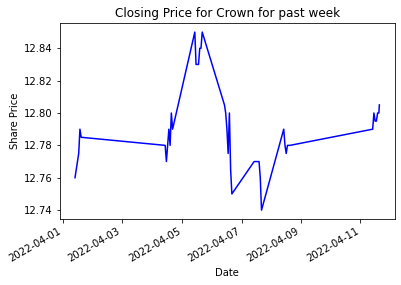

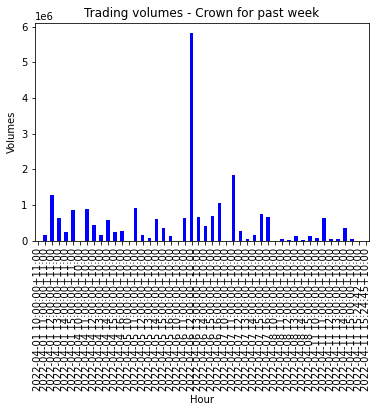

In [78]:
# Line  chart for closing prices 
create_line_chart(dataclose_df["CWN.AX"],"Closing Price for Crown for past week","Date","Share Price","blue")
# bar chart for volumes 
create_bar_chart(datavol_df["CWN.AX"],"Trading volumes - Crown for past week","Hour","Volumes","blue")




AttributeError: 'DataFrame' object has no attribute 'Close'

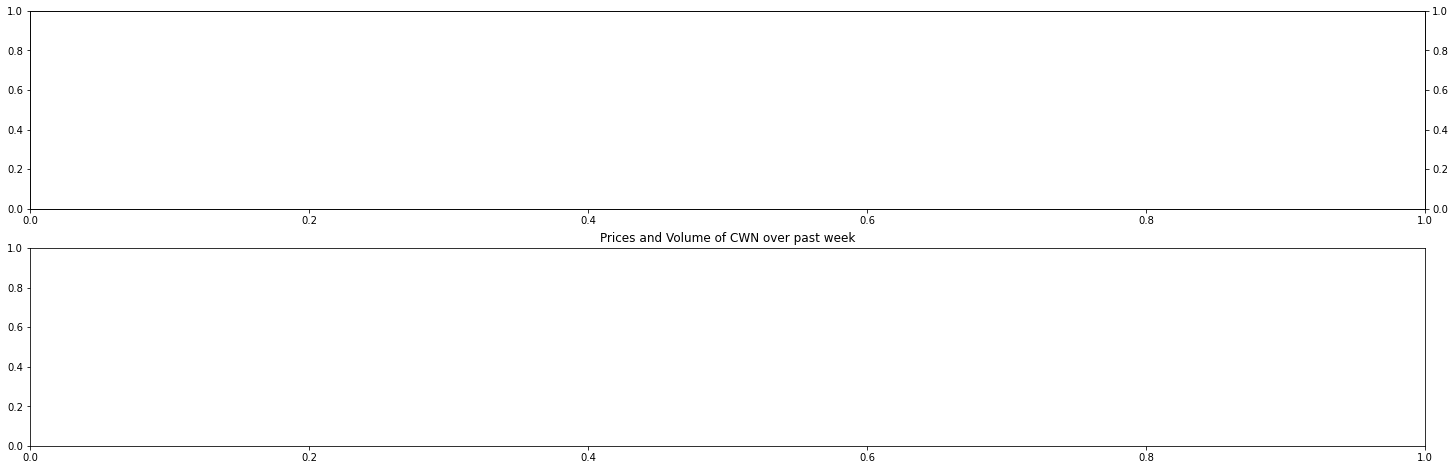

In [98]:

tidx = pd.date_range(start = '2022-04-04', end='2022-04-08', periods=5)
data_df = pd.DataFrame(pd.date_range, columns=['Close','Volume'], index=tidx)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(25,8))
plt.title('Prices and Volume of CWN over past week')
 
ax1b = ax1.twinx()    
plot1a, = ax1.plot(dataclose_df.index, dataclose_df.Close)
plot1b, = ax1b.plot(datavol_df.index, datavol_df.Volume, color='r')

ax2.set_xlabel('Date')
ax1.set_ylabel('Volume')
ax1b.set_ylabel('Closing Price')

plt.legend([plot1a, plot1b], data_df.columns)

# defining display layout
plt.tight_layout()

# show plot
plt.show()

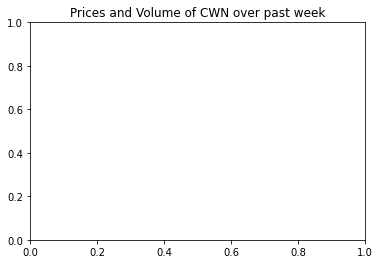

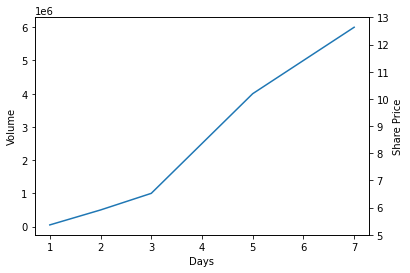

In [99]:
# Define Data

x = [1,2,3,4,5,6,7]
y = [50000,500000,1000000,2500000,4000000,5000000,6000000] 
plt.title('Prices and Volume of CWN over past week')
# Plot Graph

fig, ax1 = plt.subplots()
ax1.plot(x, y)

# Define Labels

ax1.set_xlabel('Days')
ax1.set_ylabel('Volume')

# Twin Axes

ax2 = ax1.twinx()
ax2.set_ylabel('Share Price')

# Set limit 

plt.ylim(5,13)

# Display

plt.show()

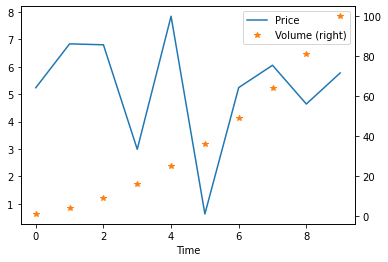

In [100]:
df = pd.DataFrame.from_dict({
    'Time' : np.arange(10),
    'Price' : np.random.rand(10)*10,
    'Volume' : np.linspace(1,10,10)**2,
})


df.plot(
    'Time', ['Price', 'Volume'], secondary_y='Volume',
    style = ['-','*'],
    )

plt.show()

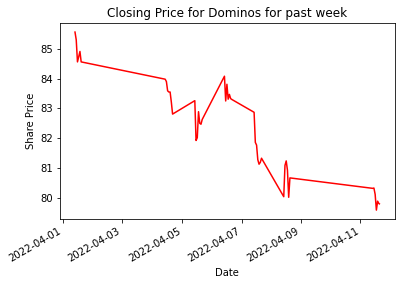

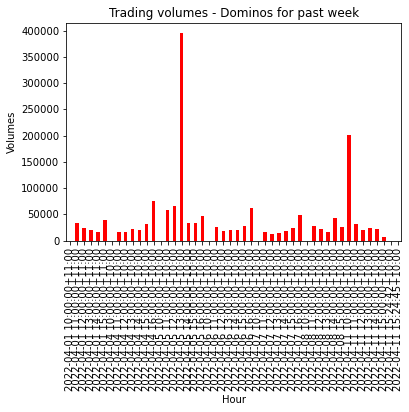

In [80]:
# Line chart for closing prices 
create_line_chart(dataclose_df["DMP.AX"],"Closing Price for Dominos for past week","Date","Share Price","red")
create_bar_chart(datavol_df["DMP.AX"],"Trading volumes - Dominos for past week","Hour","Volumes","red")

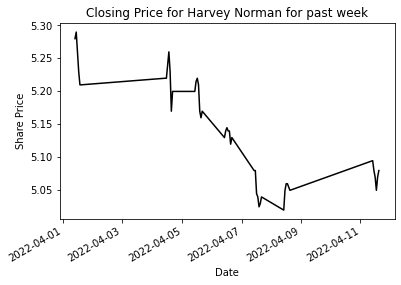

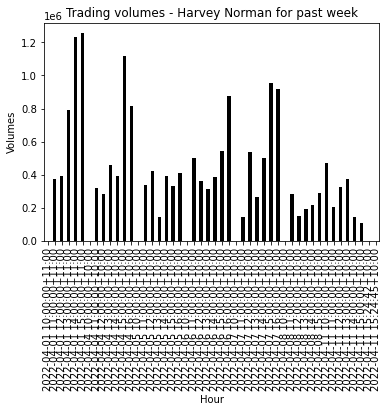

In [81]:
create_line_chart(dataclose_df["HVN.AX"],"Closing Price for Harvey Norman for past week","Date","Share Price","black")
create_bar_chart(datavol_df["HVN.AX"],"Trading volumes - Harvey Norman for past week","Hour","Volumes","black")

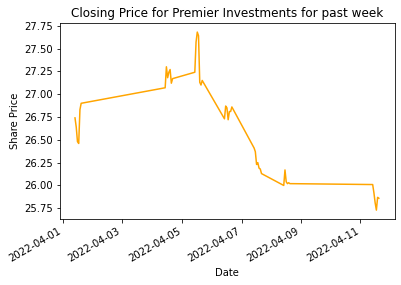

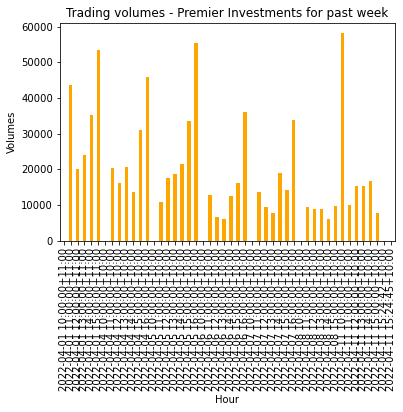

In [82]:
create_line_chart(dataclose_df["PMV.AX"],"Closing Price for Premier Investments for past week","Date","Share Price","orange")
create_bar_chart(datavol_df["PMV.AX"],"Trading volumes - Premier Investments for past week","Hour","Volumes","orange")

In [84]:
#aussharedata = yf.download('CWN.AX DMP.AX HVN.AX PMV.AX', start="2022-03-25", end="2022-04-01")
dataclose_df = dataclose_df.dropna()
dataclose_df.head(6)


,CWN.AX,DMP.AX,HVN.AX,PMV.AX
2022-04-01 10:00:00+11:00,12.760,85.559998,5.28,26.740000
2022-04-01 11:00:00+11:00,12.765,85.300003,5.29,26.639999
2022-04-01 12:00:00+11:00,12.770,84.559998,5.26,26.480000
2022-04-01 13:00:00+11:00,12.775,84.730003,5.23,26.459999
2022-04-01 14:00:00+11:00,12.790,84.910004,5.21,26.830000
2022-04-01 15:00:00+11:00,12.785,84.559998,5.21,26.900000


In [85]:
dataclosestd_df = dataclose_df.std()
dataclosestd_df.head()

CWN.AX    0.025473
DMP.AX    1.634245
HVN.AX    0.079833
PMV.AX    0.546998
dtype: float64

In [86]:
dataclosestd_df = dataclosestd_df.sort_values(ascending=False)
dataclosestd_df.head()

DMP.AX    1.634245
PMV.AX    0.546998
HVN.AX    0.079833
CWN.AX    0.025473
dtype: float64

In [87]:
correlation = dataclose_df.corr()
correlation

,CWN.AX,DMP.AX,HVN.AX,PMV.AX
CWN.AX,1.000000,-0.077207,0.223058,0.439889
DMP.AX,-0.077207,1.000000,0.820580,0.657083
HVN.AX,0.223058,0.820580,1.000000,0.771526
PMV.AX,0.439889,0.657083,0.771526,1.000000


<AxesSubplot:>

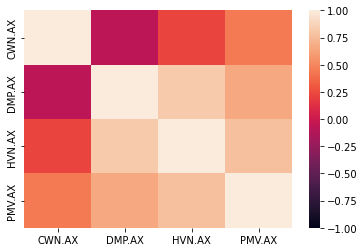

In [88]:
sns.heatmap(correlation, vmin=-1, vmax=1)

In [89]:
datareturns_df = dataclose_df.pct_change().copy()
datareturns_df.head(12)


,CWN.AX,DMP.AX,HVN.AX,PMV.AX
2022-04-01 10:00:00+11:00,NaN,NaN,NaN,NaN
2022-04-01 11:00:00+11:00,0.000392,-0.003039,0.001894,-0.003740
2022-04-01 12:00:00+11:00,0.000392,-0.008675,-0.005671,-0.006006
2022-04-01 13:00:00+11:00,0.000391,0.002010,-0.005703,-0.000755
2022-04-01 14:00:00+11:00,0.001174,0.002124,-0.003824,0.013983
2022-04-01 15:00:00+11:00,-0.000391,-0.004122,0.000000,0.002609
2022-04-04 10:00:00+10:00,-0.000391,-0.006859,0.001919,0.006320
2022-04-04 11:00:00+10:00,-0.000782,-0.000953,0.000000,0.008496
2022-04-04 12:00:00+10:00,0.000783,-0.003695,0.003831,-0.004396
2022-04-04 13:00:00+10:00,0.000782,-0.000478,0.003817,0.002207


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

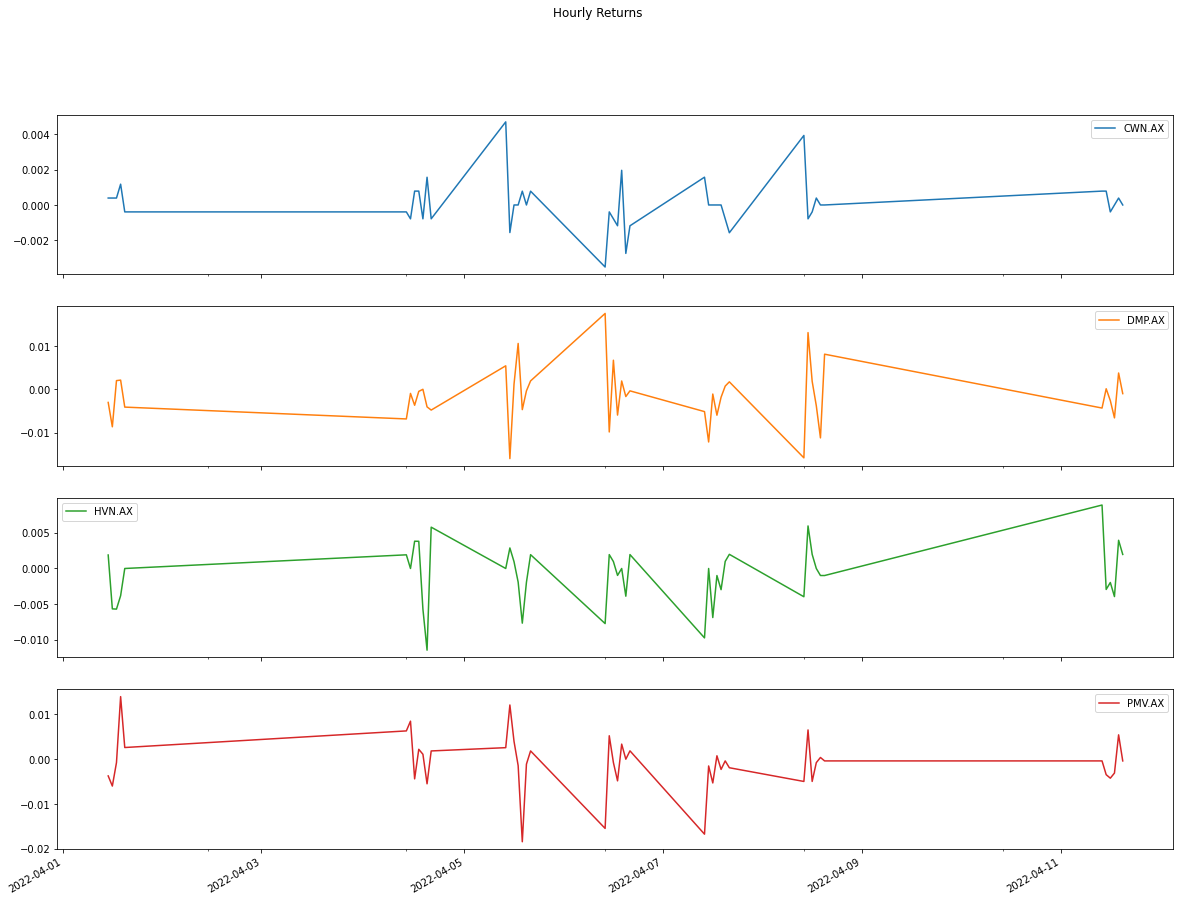

In [90]:
datareturns_df.plot(subplots=True,figsize=(20, 15), title="Hourly Returns")
#graph individually,for loop graphing each column

<AxesSubplot:title={'center':'Cumulative Returns'}>

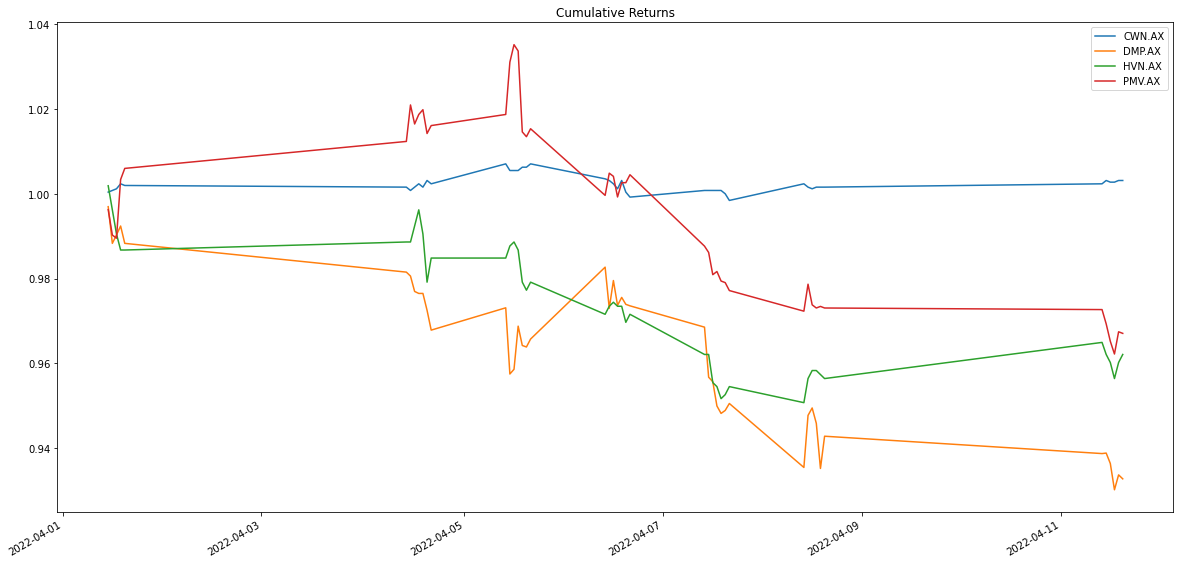

In [91]:
cumulative_returns = (1 + datareturns_df).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(20, 10), title="Cumulative Returns")